In [ ]:
#read file

In [3]:
data_text = data[['merged']]
data_text['id'] = data_text.index
documents = data_text

/var/folders/4d/g9np6zzn5w32g5k_252qvfr8jnx6pr/T/ipykernel_3420/2912817534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['id'] = data_text.index


In [4]:
documents[:5]

,merged,id
0,Iconic decay in schizophrenia.Working memory i...,0
1,Association of increased prenatal estrogen wit...,1
2,The role of expressed emotion in relationships...,2
3,Learned irrelevance and associative learning i...,3
4,Association between prepartum maternal iron de...,4


In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
import nltk.stem as stemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aparna.ashok/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
def lemmatize_stemming(text):
    ps = PorterStemmer()
    return ps.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
    
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [7]:
processed_docs = documents['merged'].map(preprocess)
processed_docs[:10]

0    [icon, decay, schizophrenia, work, memori, imp...
1    [associ, increas, prenat, estrogen, risk, fact...
2    [role, express, emot, relationship, psychiatr,...
3    [learn, irrelev, associ, learn, attenu, indivi...
4    [associ, prepartum, matern, iron, defici, offs...
5    [implic, gene, human, endogen, retroviru, fami...
6    [schizophrenia, patient, visual, inform, decod...
7    [subject, loud, realiti, auditori, verbal, hal...
8    [silent, spectrum, schizotypi, schizotax, self...
9    [influenc, emot, process, work, memori, schizo...
Name: merged, dtype: object

In [8]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 accuraci
1 add
2 arrang
3 array
4 arrow
5 block
6 build
7 capac
8 central
9 circl
10 clear


In [9]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [10]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 3),
 (4, 1),
 (5, 1),
 (6, 4),
 (7, 1),
 (8, 1),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 4),
 (15, 1),
 (16, 2),
 (17, 1),
 (18, 10),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 2),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 5)]

In [11]:
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]], 
bow_doc_0[i][1]))

Word 0 ("cognit") appears 1 time.
Word 1 ("consist") appears 1 time.
Word 2 ("contribut") appears 1 time.
Word 3 ("control") appears 3 time.
Word 4 ("current") appears 1 time.
Word 5 ("decreas") appears 1 time.
Word 6 ("deficit") appears 4 time.
Word 7 ("determin") appears 1 time.
Word 8 ("differ") appears 1 time.
Word 9 ("evid") appears 2 time.
Word 10 ("follow") appears 1 time.
Word 11 ("healthi") appears 1 time.
Word 12 ("high") appears 1 time.
Word 13 ("ill") appears 1 time.
Word 14 ("impair") appears 4 time.
Word 15 ("implic") appears 1 time.
Word 16 ("increas") appears 2 time.
Word 17 ("indic") appears 1 time.
Word 18 ("memori") appears 10 time.
Word 19 ("number") appears 1 time.
Word 20 ("particip") appears 1 time.
Word 21 ("perform") appears 1 time.
Word 22 ("popul") appears 1 time.
Word 23 ("present") appears 1 time.
Word 24 ("provid") appears 1 time.
Word 25 ("reduc") appears 1 time.
Word 26 ("report") appears 2 time.
Word 27 ("subject") appears 1 time.
Word 28 ("term") appea

In [12]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.04686294985433579),
 (1, 0.06435967230024468),
 (2, 0.06975598983846731),
 (3, 0.1165531896090859),
 (4, 0.06435967230024468),
 (5, 0.0762961034939331),
 (6, 0.2122952007659053),
 (7, 0.0762961034939331),
 (8, 0.04169254908574613),
 (9, 0.0966055314767715),
 (10, 0.06562313180959142),
 (11, 0.055766842336302275),
 (12, 0.06314577318582769),
 (13, 0.06314577318582769),
 (14, 0.20560157928457484),
 (15, 0.06831617395441736),
 (16, 0.09097429470811357),
 (17, 0.053073800191476325),
 (18, 0.8016996034594208),
 (19, 0.07817246342770652),
 (20, 0.06831617395441736),
 (21, 0.053073800191476325),
 (22, 0.06975598983846731),
 (23, 0.050596441567712605),
 (24, 0.06314577318582769),
 (25, 0.05484287939385156),
 (26, 0.1239553853468856),
 (27, 0.04904859604511979),
 (28, 0.07452702429155789),
 (29, 0.05484287939385156),
 (30, 0.0762961034939331),
 (31, 0.356330339319878)]


# LDA with BoW model

In [14]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Topic: 0 
Words: 0.068*"disord" + 0.034*"subject" + 0.025*"associ" + 0.024*"control" + 0.022*"function" + 0.021*"group" + 0.021*"genet" + 0.021*"treatment" + 0.019*"effect" + 0.016*"significantli"
Topic: 1 
Words: 0.031*"acut" + 0.030*"treatment" + 0.029*"induc" + 0.026*"chang" + 0.026*"memori" + 0.025*"rat" + 0.024*"effect" + 0.022*"associ" + 0.022*"disord" + 0.020*"report"
Topic: 2 
Words: 0.043*"brain" + 0.035*"cognit" + 0.033*"social" + 0.026*"model" + 0.025*"process" + 0.023*"effect" + 0.023*"function" + 0.020*"deficit" + 0.018*"activ" + 0.016*"level"
Topic: 3 
Words: 0.033*"symptom" + 0.027*"relationship" + 0.026*"psychosi" + 0.025*"level" + 0.024*"risk" + 0.021*"neg" + 0.021*"associ" + 0.019*"respons" + 0.017*"assess" + 0.017*"ill"
Topic: 4 
Words: 0.034*"activ" + 0.027*"symptom" + 0.027*"cognit" + 0.025*"receptor" + 0.025*"induc" + 0.025*"effect" + 0.024*"treatment" + 0.021*"model" + 0.020*"drug" + 0.020*"control"
Topic: 5 
Words: 0.030*"predict" + 0.027*"risk" + 0.024*"disord"

In [15]:
from gensim.models import CoherenceModel

In [17]:

summary_df = pd.DataFrame(columns=["no_of_topics","coherence","perplexity"])
for i in range(5,41):
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=2, workers=2)
    doc_lda = lda_model[bow_corpus]
    perplexity = lda_model.log_perplexity(bow_corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    summary_df = summary_df.append({"no_of_topics": i, "coherence": coherence_lda, "perplexity": perplexity }, ignore_index=True)

/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/pro

In [18]:
summary_df.head()

,no_of_topics,coherence,perplexity
0,5.0,0.271123,-5.097218
1,6.0,0.279279,-5.134826
2,7.0,0.275436,-5.184862
3,8.0,0.273993,-5.195880
4,9.0,0.290274,-5.164739


<AxesSubplot:xlabel='no_of_topics'>

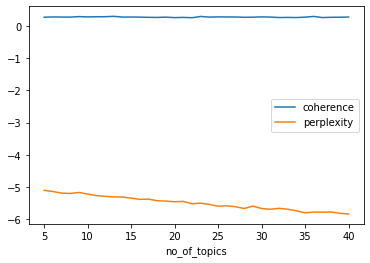

In [19]:
summary_df.plot(x = "no_of_topics", y = ["coherence","perplexity"])

# LDA with TF-IDF

In [20]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/pro

Topic: 0 Word: 0.032*"risk" + 0.025*"disord" + 0.023*"behavior" + 0.019*"social" + 0.016*"high" + 0.015*"effect" + 0.015*"onset" + 0.014*"induc" + 0.013*"deficit" + 0.013*"control"
Topic: 1 Word: 0.021*"brain" + 0.021*"function" + 0.019*"gene" + 0.019*"follow" + 0.017*"treatment" + 0.016*"popul" + 0.015*"antipsychot" + 0.014*"year" + 0.013*"genet" + 0.013*"ill"
Topic: 2 Word: 0.030*"self" + 0.023*"individu" + 0.023*"experi" + 0.020*"depress" + 0.018*"rel" + 0.017*"symptom" + 0.017*"test" + 0.017*"scale" + 0.015*"report" + 0.014*"impair"
Topic: 3 Word: 0.022*"process" + 0.020*"respons" + 0.019*"psychiatr" + 0.018*"activ" + 0.018*"subject" + 0.016*"measur" + 0.016*"clinic" + 0.015*"brain" + 0.015*"antipsychot" + 0.015*"famili"
Topic: 4 Word: 0.029*"model" + 0.023*"brain" + 0.020*"receptor" + 0.019*"cortex" + 0.018*"term" + 0.018*"diseas" + 0.018*"function" + 0.017*"rat" + 0.016*"metabol" + 0.015*"interact"
Topic: 5 Word: 0.022*"gene" + 0.020*"review" + 0.018*"stress" + 0.018*"factor" + 0

In [21]:
summary_df = pd.DataFrame(columns=["no_of_topics","coherence","perplexity"])
for i in range(5,41):
    lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=i, id2word=dictionary, passes=2, workers=4)
    doc_lda = lda_model[bow_corpus]
    perplexity = lda_model.log_perplexity(bow_corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    summary_df = summary_df.append({"no_of_topics": i, "coherence": coherence_lda, "perplexity": perplexity }, ignore_index=True)

/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/pro

In [22]:
summary_df.head()

,no_of_topics,coherence,perplexity
0,5.0,0.228705,-5.414723
1,6.0,0.258743,-5.495885
2,7.0,0.231094,-5.544738
3,8.0,0.275866,-5.627097
4,9.0,0.247005,-5.676272


<AxesSubplot:xlabel='no_of_topics'>

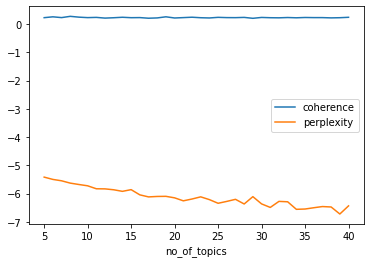

In [23]:
summary_df.plot(x = "no_of_topics", y = ["coherence","perplexity"])

# Bio_df LDA with BoW model

In [55]:
summary_df = pd.DataFrame(columns=["no_of_topics","coherence","perplexity"])
for i in range(5,21):
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=2, workers=2)
    doc_lda = lda_model[bow_corpus]
    perplexity = lda_model.log_perplexity(bow_corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs_3, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    summary_df = summary_df.append({"no_of_topics": i, "coherence": coherence_lda, "perplexity": perplexity }, ignore_index=True)

/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/pro

In [56]:
summary_df.head()

,no_of_topics,coherence,perplexity
0,5.0,1.0,-1.076136
1,6.0,1.0,-1.197489
2,7.0,1.0,-1.295360
3,8.0,1.0,-1.377720
4,9.0,1.0,-1.449088


<AxesSubplot:xlabel='no_of_topics'>

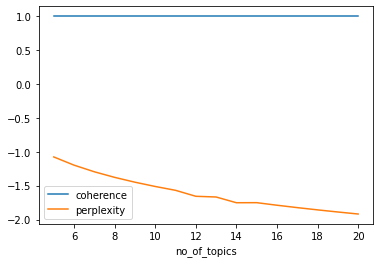

In [57]:
summary_df.plot(x = "no_of_topics", y = ["coherence","perplexity"])

<AxesSubplot:xlabel='no_of_topics'>

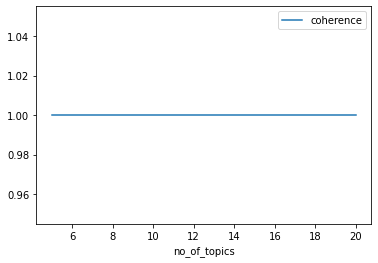

In [58]:
summary_df.plot(x = "no_of_topics", y = "coherence")

# Bio_df LDA with TF-IDF model

In [59]:
summary_df = pd.DataFrame(columns=["no_of_topics","coherence","perplexity"])
for i in range(5,21):
    lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=i, id2word=dictionary, passes=2, workers=4)
    doc_lda = lda_model[bow_corpus]
    perplexity = lda_model.log_perplexity(bow_corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs_3, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    summary_df = summary_df.append({"no_of_topics": i, "coherence": coherence_lda, "perplexity": perplexity }, ignore_index=True)

/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/aparna.ashok/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/pro

In [60]:
summary_df.head()

,no_of_topics,coherence,perplexity
0,5.0,1.0,-1.076136
1,6.0,1.0,-1.214994
2,7.0,1.0,-1.295360
3,8.0,1.0,-1.377719
4,9.0,1.0,-1.449088


<AxesSubplot:xlabel='no_of_topics'>

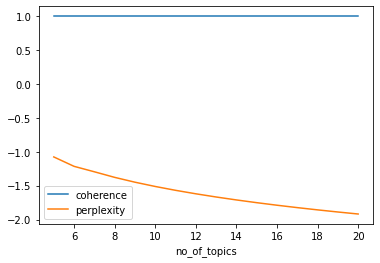

In [61]:
summary_df.plot(x = "no_of_topics", y = ["coherence","perplexity"])

<AxesSubplot:xlabel='no_of_topics'>

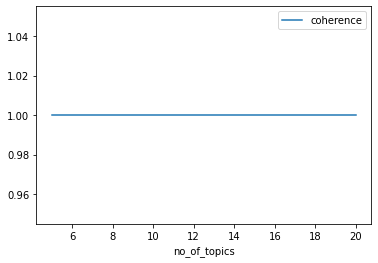

In [62]:
summary_df.plot(x="no_of_topics", y="coherence")

<AxesSubplot:xlabel='no_of_topics'>

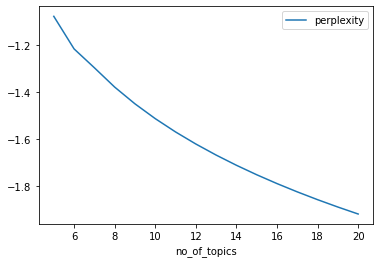

In [63]:
summary_df.plot(x="no_of_topics", y="perplexity")